In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils import generate_constrained_random
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [3]:
data = pd.read_csv('../../../Dataset/Spambase/spambase.data.txt', header=None)

In [4]:
y = data.pop(57).values
X = data.values
feature_names = data.columns
print X.shape, y.shape

(4601, 57) (4601,)


In [7]:
X_random = generate_constrained_random(X, feature_names, 1000)
print X_random.shape

(1000, 57)


In [8]:
lr = LogisticRegression()
lr.fit(X, y)
print lr.score(X, y)
y_random = lr.predict(X_random.values)

0.93218865464


In [13]:
lr = LogisticRegression()
lr.fit(X_random, y_random)
print lr.score(X, y)

0.885024994566


In [67]:
new_data = pd.concat((X_random, pd.DataFrame(y_random)), axis=1)
print new_data.shape

(1000, 58)


In [80]:
new_data.to_csv('../data/new_data.csv')

In [20]:
data_spam = new_data.loc[new_data.iloc[:, -1] == 1]
print data_spam.shape

(137, 58)


In [92]:
words = [word.split('_')[-1] for word in new_data.columns]
words = [word for word in words if len(word) >= 1]
print len(words)

57


In [113]:
i = 0
dic = {}
for word in words:
    dic[word] = data_spam.iloc[0, i]
    i += 1

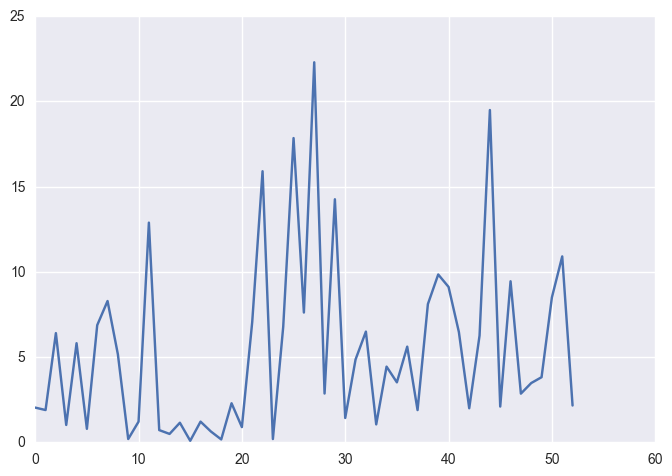

In [123]:
plt.plot([val for val in dic.values() if val > 0 and val < 100])